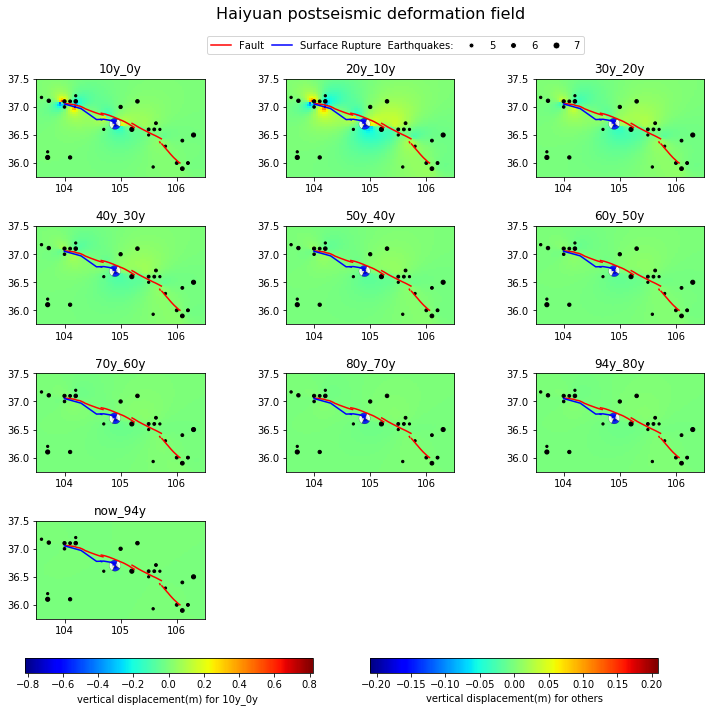

In [37]:
import rasterio
import rasterio.plot
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import geopandas
import math
import os
import copy
from obspy.imaging.beachball import beach

#workdir = '/home/lvxr/insarlab/jupyter/lab/LargeEarthquake/MODEL/model4/Haiyuan/disp_tp/tiff_file/'
workdir = '/home/lvxr/insarlab/jupyter/lab/LargeEarthquake/MODEL/model4/Haiyuan/PS_dat/tif/'

# read shapefile data
shps_fault = geopandas.read_file('/home/lvxr/insarlab/jupyter/lab/LargeEarthquake/Fault/Haiyuan_Fault.shp')
shps_surface_rupture = geopandas.read_file('/home/lvxr/insarlab/jupyter/lab/LargeEarthquake/suface_rupture/Haiyuan.shp')
shps_seismicity =  geopandas.read_file('/home/lvxr/insarlab/jupyter/lab/LargeEarthquake/seismicity/Haiyuan.shp')

# set lat and lon and focal mechanism of beachball 
beach_lat = 36.7
beach_lon = 104.9
focmecs = [300,88,1] #[strike, dip, rake]

# count the number of *.tif files
tif_files = []
for filename in os.listdir(workdir):
    if os.path.splitext(filename)[1] == '.tif':
        tif_files.append(filename)
tif_files.sort()

# design row and cols in a figure
ncols = 3 # can be changed 
nrows = math.ceil(len(tif_files) / ncols)
figure_size = [8.0,5.0] #please don't change
fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = figure_size)

# calculate max and min of color bar
raster = rasterio.open('/home/lvxr/insarlab/jupyter/lab/LargeEarthquake/MODEL/model4/Haiyuan/PS_dat/tif/poseis-20y_10y_vertical.tif')
data_colorbar = raster.read(1)
cb_max = round(max(abs(data_colorbar.max()),abs(data_colorbar.min())),4)
               
# design color bar
cmap = plt.cm.jet

# plot pictures
num = 0
for row in range(nrows):
    for col in range(ncols):
        ax = axs[row,col]
        if num < len(tif_files):
            if num == 0:
                # for the postseismic deformation during 0-10year, use its own displacement range because it is too large compared with others
                raster_name = tif_files[num]
                raster = rasterio.open(workdir+raster_name)
                data_colorbar = raster.read(1)
                cb_max_single = round(max(abs(data_colorbar.max()),abs(data_colorbar.min())),4)
                rasterio.plot.show(raster,1,ax = ax, vmin = -cb_max_single, vmax = cb_max_single, cmap=cmap)
                shps_fault.plot(color='red',ax = ax)
                shps_surface_rupture.plot(color='blue',ax = ax)
                shps_seismicity.plot(color='black',ax = ax, markersize = shps_seismicity['Magnitude'])
                #plot beach ball
                b = beach(focmecs, xy=(beach_lon,beach_lat), width=(0.2,0.2), linewidth=0.2,alpha=0.85)
                b.set_zorder(1)
                ax.add_collection(b)
            else:
                raster_name = tif_files[num]
                raster = rasterio.open(workdir+raster_name)
                rasterio.plot.show(raster,1,ax = ax, vmin = -cb_max, vmax = cb_max, cmap=cmap)
                shps_fault.plot(color='red',ax = ax)
                shps_surface_rupture.plot(color='blue',ax = ax)
                shps_seismicity.plot(color='black',ax = ax, markersize = shps_seismicity['Magnitude'])
                #plot beach ball
                b = beach(focmecs, xy=(beach_lon,beach_lat), width=(0.2,0.2), linewidth=0.2,alpha=0.85)
                b.set_zorder(1)
                ax.add_collection(b)
        else:
            ax.set_visible(False)        
        num = num + 1
        # set title for each subplot
        title_name = (raster_name.split(".")[0]).split("-")[1]
        title = title_name.split("_")[0] + '_' + title_name.split("_")[1]
        ax.title.set_text(title)

# adjust subplot 
left_adjust = 0
bottom_adjust = 0
right_adjust = 1.2
top_adjust = 1.5
plt.subplots_adjust(left = left_adjust, bottom = bottom_adjust , right = right_adjust, top = top_adjust, wspace = 0.3, hspace = 0.5 )#please don't change

# add colorbar (need to define your custom ScalarMappable(an example about how to plot without using imshow function))
cax1 = fig.add_axes([0, -0.15, 0.5, 0.04])#define the position of ax1
sm1 = plt.cm.ScalarMappable(cmap=cmap)
sm1.set_array([])
sm1.set_clim(vmin = -cb_max_single, vmax = cb_max_single)
fig.colorbar(sm1,cax1, orientation = 'horizontal', label = 'vertical displacement(m) for 10y_0y ')

cax2 = fig.add_axes([0.60, -0.15, 0.5, 0.04])#define the position of ax2
sm2 = plt.cm.ScalarMappable(cmap=cmap)
sm2.set_array([])
sm2.set_clim(vmin = -cb_max, vmax = cb_max)
fig.colorbar(sm2,cax2, orientation = 'horizontal', label = 'vertical displacement(m) for others')

#create lengend
fault = mlines.Line2D([], [], color='red',markersize=15, label='Fault') #create signal and label
sur_rup = mlines.Line2D([], [], color='blue',markersize=15, label='Surface Rupture  Earthquakes:') #create signal and label
#seismicity = mpatches.Circle(([],[]),radius =0.0010, color='black', label='Earthquakes')
seismicity1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markersize=5,  markerfacecolor="black",label='5')
seismicity2 = mlines.Line2D(range(1), range(1), color="white", marker='o', markersize=6,  markerfacecolor="black",label='6')
seismicity3 = mlines.Line2D(range(1), range(1), color="white", marker='o', markersize=7,  markerfacecolor="black",label='7')
#line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="green")
#line3 = mlines.Line2D(range(1), range(1), color="white", marker='o',markersize=5, markerfacecolor="slategray")
axs.flatten()[1].legend(handles=[fault,sur_rup,seismicity1,seismicity2,seismicity3],bbox_to_anchor=(-0.5, 1.2,2.3, 0.102),loc='lower left',ncol=5,mode='expand') #design the position of legend

# set figure title
fig.suptitle('Haiyuan postseismic deformation field', x = right_adjust / 2, y = top_adjust + 0.2, fontsize=16) 

#save figure
fig_name = 'Haiyuan_postseismic_displ.png'
fig_output = workdir + fig_name
fig.savefig(fig_output, dpi=200, bbox_inches='tight')